## REGRESIÓN LINEAL SIMPLE

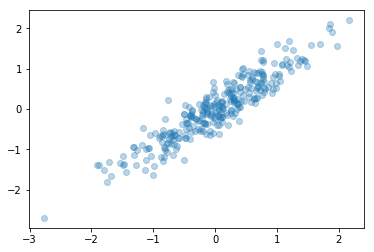

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

X1 = np.random.randn(300,2)
A = np.array([[0.6,.4], [.4,.6]])
X2 = np.dot(X1, A)
plt.plot(X2[:,0], X2[:,1], "o", alpha=0.3)

### Creamos un modelo lineal que ajuste a los datos

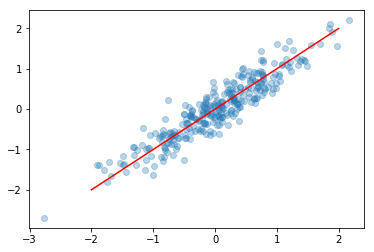

In [4]:
model=[0+1*x for x in np.arange(-2,3)]
plt.plot(X2[:,0], X2[:,1], "o", alpha=0.3)
plt.plot(np.arange(-2,3), model, 'r')
plt.show()

In [ ]:
Computar suma de errores cuadráticos

Optimization terminated successfully.
         Current function value: 47.284749
         Iterations: 71
         Function evaluations: 134


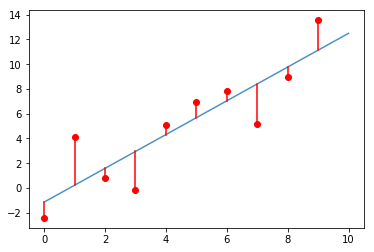

In [7]:
import numpy as np
from pylab import plt, show
from scipy.optimize import fmin
import matplotlib.pylab as pl


def generate_pseudoline(numberOfValues):
    x = np.arange(0,numberOfValues)
    y = x + np.random.normal(0,2,numberOfValues)
    return x, y

x,y = generate_pseudoline(10)
ss = lambda theta, x, y: np.sum((y - theta[0] - theta[1]*x)**2)

b0, b1 = fmin(ss, [0,1], args=(x,y));

pl.plot(x, y, 'ro')
pl.plot([0,10], [b0, b0+b1*10], alpha=0.8)

for xi, yi in zip(x,y):
    pl.plot([xi]*2, [yi, b0+b1*xi], "r-")

In [ ]:
Predecir qué valores obtendríamos hasta 20

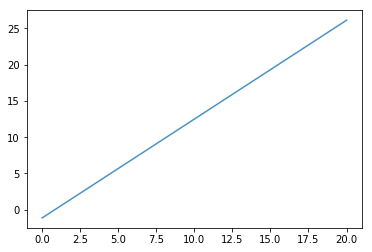

In [8]:
pl.plot([0,20], [b0, b0+b1*20], alpha=0.8)

In [10]:
print("Coeficientes", b0, "", b1)

Coeficientes -1.1384632313903649  1.363583578928046


In [11]:
import statsmodels.api as sm

x = sm.add_constant(x)
est = sm.OLS(y, x)
est = est.fit()
est.summary()

C:\Users\cxb0254\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     25.95
Date:                Wed, 17 Apr 2019   Prob (F-statistic):           0.000936
Time:                        14:40:43   Log-Likelihood:                -21.957
No. Observations:                  10   AIC:                             47.91
Df Residuals:                       8   BIC:                             48.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1385      1.429     -0.797      0.449      -4.434       2.157
x1             1.3636      0.268      5.094      0.001       0.746       1.981
==============================================================================
Omnibus:                        0.095   Durbin-Watson:                   2.180
Prob(Omnibus):                  0.954   Jarque-Bera (JB):                0.312
Skew:                           0.087   Prob(JB):                        0.856
Kurtosis:                       2.152   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
est.params

array([-1.13847145,  1.36358742])

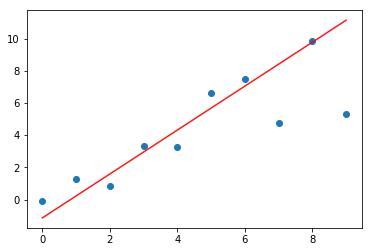

In [19]:
X_prime, Y_prime = generate_pseudoline(10)

#We calculate the predicted values
y_hat = est.predict(sm.add_constant(X_prime))

plt.scatter(X_prime, Y_prime, alpha=1)
plt.plot(sm.add_constant(X_prime)[:,1], y_hat, 'r', alpha=0.9)

## REGRESIÓN MÚLTIPLE

In [34]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
df_adv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
X = df_adv[['TV', 'radio']]
y = df_adv['sales']
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


<Figure size 432x288 with 0 Axes>

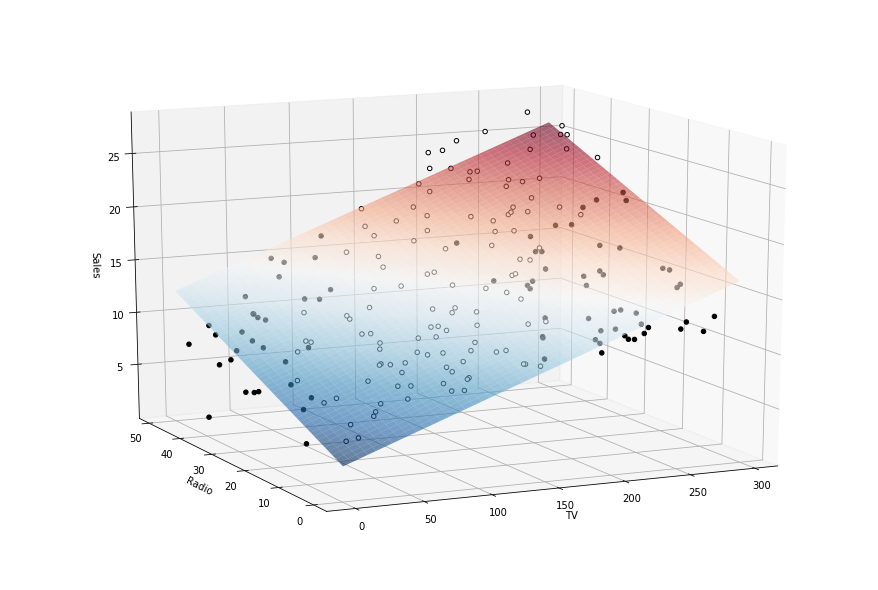

<Figure size 432x288 with 0 Axes>

In [43]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Fit a OLS model with intercept on TV and radio
X = sm.add_constant(X)
est= sm.OLS(y, X).fit()

# Create a 3D plot
xx1, xx2 = np.meshgrid(np.linspace(X.TV.min(), X.TV.max(), 100),
                       np.linspace(X.radio.min(), X.radio.max(), 100))

# Plot the hyperplane by evaluating the parameters on the grid
Z = est.params[0] + est.params[1] * xx1 + est.params[2]*xx2

# Create matplotlib 3D axes
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

# Plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# Plot data points - points over the HP are white, points below are black
resid = y - est.predict(X)
ax.scatter(X[resid >= 0].TV, X[resid >= 0].radio, y[resid >= 0], color = 'black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].TV, X[resid < 0].radio, y[resid <0], color = 'black', alpha=1.0)

# Set axis labels
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')
plt.figure()

## REGRESIÓN LOGÍSTICA

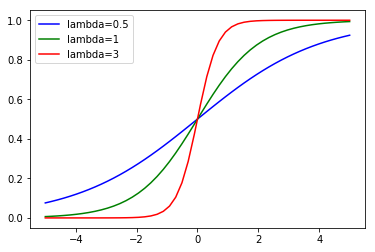

In [52]:
def logist(x,l):
    return 1/(1+np.exp(-l*x))

x = np.linspace(-5,5)
t = logist(x,0.5)
y = logist(x,1)
z = logist(x,3)
plt.plot(x,t, label='lambda=0.5', color='blue')
plt.plot(x,y, label='lambda=1', color='green')
plt.plot(x,z, label='lambda=3', color='red')
plt.legend(loc='upper left')

C:\Users\cxb0254\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


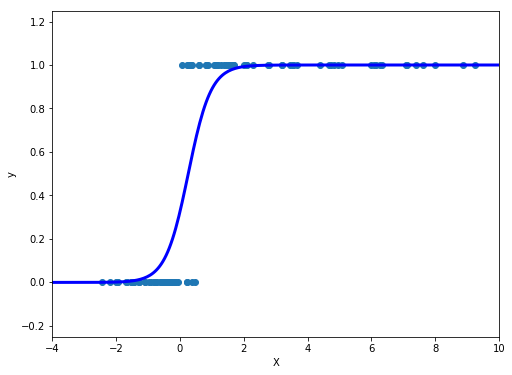

In [54]:
import numpy as np
import pylab as pl
from sklearn import linear_model

# This is our test set, it´s just a straight line with some gaussian noise
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X>0).astype(np.float)
X[X>0]*=4
X += .3*np.random.normal(size=n_samples)
X=X[:, np.newaxis]

# Run the classifier
clf = linear_model.LogisticRegression()
clf.fit(X,y)

# Plot the result
pl.figure(1, figsize=(8,6))
pl.clf()    # Clear the current figure
pl.scatter(X,y)

# Hasta aquí el modelo ha sido entrenado, ahora le damos nuevos valores sin etiquetar para representar la función
X_test = np.linspace(-5,10,300)

def model(x):
    return 1/(1+np.exp(-x))
loss = model(X_test * clf.coef_ + clf.intercept_).ravel()
pl.plot(X_test, loss, color='blue', linewidth=3)

pl.ylabel('y')
pl.xlabel('X')

pl.ylim(-.25, 1.25)
pl.xlim(-4,10)

pl.show()

## REGRESIÓN POLINOMIAL

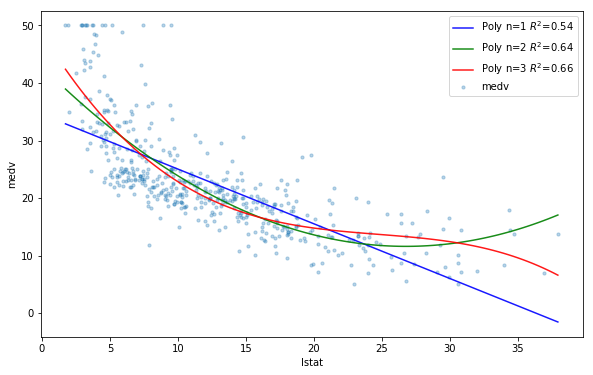

In [56]:
df = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/MASS/Boston.csv')

# Plot lstat (% lower status of the population) against median value
plt.figure(figsize=(6 * 1.618, 6))
plt.scatter(df.lstat, df.medv, s=10, alpha=0.3)
plt.xlabel('lstat')
plt.ylabel('medv')

# Points linearLyd space on lstats
x = pd.DataFrame({'lstat': np.linspace(df.lstat.min(), df.lstat.max(), 100)})

# 1st order polynomial
poly_1 = smf.ols(formula = 'medv ~ 1 + lstat', data= df).fit()
plt.plot(x.lstat, poly_1.predict(x), 'b-', label = 'Poly n=1 $R^2$=%.2f' % poly_1.rsquared, alpha=0.9)

# 2st order polynomial
poly_2 = smf.ols(formula = 'medv ~ 1 + lstat + I(lstat ** 2)', data= df).fit()
plt.plot(x.lstat, poly_2.predict(x), 'g-', label = 'Poly n=2 $R^2$=%.2f' % poly_2.rsquared, alpha=0.9)

# 3st order polynomial
poly_3 = smf.ols(formula = 'medv ~ 1 + lstat + I(lstat ** 2) + I(lstat ** 3)', data= df).fit()
plt.plot(x.lstat, poly_3.predict(x), 'r-', label = 'Poly n=3 $R^2$=%.2f' % poly_3.rsquared, alpha=0.9)

plt.legend()